In [1]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import re

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/riley/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read the chat data as lines from the text file
with open('WhatsApp Chat with Favour.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Initialize lists to store extracted data
timestamps = []
senders = []
messages = []

# Define a regex pattern to match the timestamp, sender, and message
pattern = r'^(\d{2}/\d{2}/\d{4}, \d{2}:\d{2}) - ([^:]+): (.*)$'

# Loop through the lines and extract data
for line in lines:
    match = re.match(pattern, line)
    if match:
        timestamp = match.group(1)
        sender = match.group(2)
        message = match.group(3)
        timestamps.append(timestamp)
        senders.append(sender)
        messages.append(message)

# Create a DataFrame from the extracted data
df = pd.DataFrame({'Timestamp': timestamps, 'Sender': senders, 'Message': messages})

# Display the DataFrame
print(df)

              Timestamp  Sender                       Message
0     05/05/2023, 21:27    Neku                            Yo
1     05/05/2023, 21:31  Favour                   Hi Rileyyyy
2     06/05/2023, 18:24    Neku        Are you not performing
3     07/05/2023, 00:06  Favour                       Heheee😂
4     07/05/2023, 00:29    Neku                          Scam
...                 ...     ...                           ...
3848  04/10/2023, 10:42  Favour                    I need it🫠
3849  04/10/2023, 10:45    Neku  I could tell you other ones🌚
3850  04/10/2023, 10:45    Neku       EgbulefuB usually works
3851  04/10/2023, 10:46    Neku         There's OdenE as well
3852  04/10/2023, 10:48    Neku               <Media omitted>

[3853 rows x 3 columns]


In [4]:
with open('WhatsApp Chat with Favour.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Initialize lists to store extracted data
timestamps = []
senders = []
messages = []

# Define a regex pattern to match the timestamp, sender, and message
pattern = r'^(\d{2}/\d{2}/\d{4}, \d{2}:\d{2}) - ([^:]+): (.*)$'

# Loop through the lines and extract data while filtering out unwanted rows
for line in lines:
    match = re.match(pattern, line)
    if match:
        timestamp = match.group(1)
        sender = match.group(2)
        message = match.group(3)

        # Check for media omitted rows or other unwanted metadata
        if not message.startswith('<Media omitted') and not message.startswith('Messages and calls are'):
            timestamps.append(timestamp)
            senders.append(sender)
            messages.append(message)

# Create a DataFrame from the extracted data
df = pd.DataFrame({'Timestamp': timestamps, 'Sender': senders, 'Message': messages})

# Lowercase all messages
df['Message'] = df['Message'].str.lower()

# Remove special characters and emojis using regex
df['Message'] = df['Message'].str.replace(r'[^\w\s]', ' ').str.strip()

# Display the cleaned DataFrame
print(df)

              Timestamp  Sender                       Message
0     05/05/2023, 21:27    Neku                            yo
1     05/05/2023, 21:31  Favour                   hi rileyyyy
2     06/05/2023, 18:24    Neku        are you not performing
3     07/05/2023, 00:06  Favour                       heheee😂
4     07/05/2023, 00:29    Neku                          scam
...                 ...     ...                           ...
3188  04/10/2023, 10:42  Favour                        oh wow
3189  04/10/2023, 10:42  Favour                    i need it🫠
3190  04/10/2023, 10:45    Neku  i could tell you other ones🌚
3191  04/10/2023, 10:45    Neku       egbulefub usually works
3192  04/10/2023, 10:46    Neku         there's odene as well

[3193 rows x 3 columns]


In [6]:
# Remove metadata and keep only the message
df['Message'] = df['Message'].str.replace('\[.*\]', '')


# Remove empty messages
df = df[df['Message'].str.strip().astype(bool)]

In [7]:
# Initialize the sentiment analyze
sia = SentimentIntensityAnalyzer()


# Apply sentiment analysis to each message
df['sentiment_scores'] = df['Message'].apply(lambda Message: sia.polarity_scores(Message))

In [8]:
df['compound_score'] = df['sentiment_scores'].apply(lambda score: score['compound'])
df['positive_score'] = df['sentiment_scores'].apply(lambda score: score['pos'])
df['negative_score'] = df['sentiment_scores'].apply(lambda score: score['neg'])
df['neutral_score'] = df['sentiment_scores'].apply(lambda score: score['neu'])

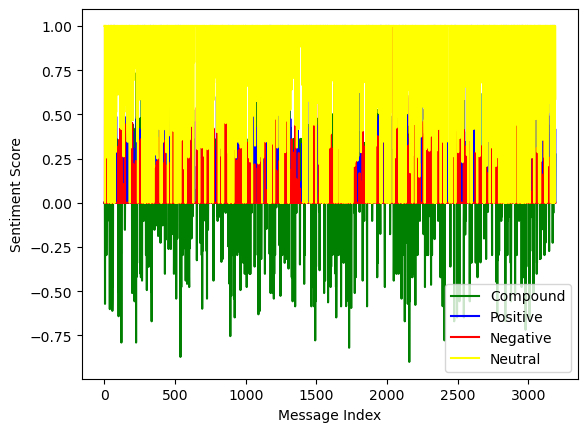

In [13]:
import matplotlib.pyplot as plt


# Plot sentiment scores over time
plt.plot(df.index, df['compound_score'], label='Compound', color = 'green')
plt.plot(df.index, df['positive_score'], label='Positive', color='blue')
plt.plot(df.index, df['negative_score'], label='Negative', color='red')
plt.plot(df.index, df['neutral_score'], label='Neutral', color='yellow')


# Set plot labels and legend
plt.xlabel('Message Index')
plt.ylabel('Sentiment Score')
plt.legend()

# Show the plot
plt.show()